# Extracting Sources from the Euclid Perseus Cluster
In this notebook, we will focus on loading in the Euclid ERO data of the Perseus cluster and extracting sources. Note that the ERO data is huge, so we will crop this into sections of $1400\times1400$ pixels. We will just cover one example of this here. Before working through this notebook, make sure that the VIS band data has been reprojected onto the same WCS as the NISP band data seeing as they're of different angular sizes. You can do this using the *VIS_to_NISP_reproject.ipynb* notebook. 

At the end of this notebook, we will paint in simulated strong gravitational lenses into the cutouts. To simulate the lenses, follow the *Lens_Simulation.ipynb*. More information about the simulations is given in the notebook.

We will start by importing the required packages and stating the path to the directory of the Perseus files.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

# data directory
data_dir = "/Users/ruby/Documents/Python Scripts/Euclid/ERO/"
# list of fits files
fits_files = ['Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits',
              'Euclid-NISP-H-ERO-Perseus-LSB.v2.fits',
              'Euclid-NISP-J-ERO-Perseus-LSB.v2.fits',
              'reproject-Euclid-VIS-ERO-Perseus-LSB.v6.fits']

nbands = len(fits_files)
filters = ['NISP-Y', 'NISP-H', 'NISP-J', 'VIS']

Let's check the headers.

In [2]:
# open and check the fits files
hdu = fits.open(data_dir+'Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits')
hdu.info()
hdu.close()
hdu = fits.open(data_dir+'Euclid-NISP-H-ERO-Perseus-LSB.v2.fits')
hdu.info()
hdu.close()
hdu = fits.open(data_dir+'Euclid-NISP-J-ERO-Perseus-LSB.v2.fits')
hdu.info()
hdu.close()
hdu = fits.open(data_dir+'reproject-2-Euclid-VIS-ERO-Perseus-LSB.v6.fits')
hdu.info()
hdu.close()    

Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (14000, 14000)   float32   
Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-NISP-H-ERO-Perseus-LSB.v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (14000, 14000)   float32   
Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-NISP-J-ERO-Perseus-LSB.v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (14000, 14000)   float32   
Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/reproject-2-Euclid-VIS-ERO-Perseus-LSB.v6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     214   (14000, 14000)   float64   


Great, they are all of the same size.
Now, let's crop this.

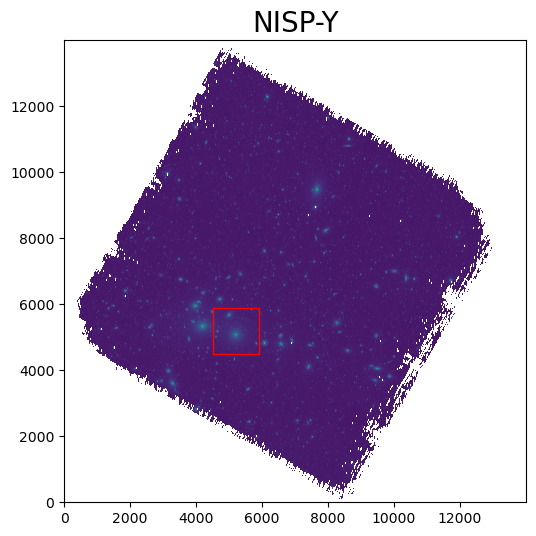

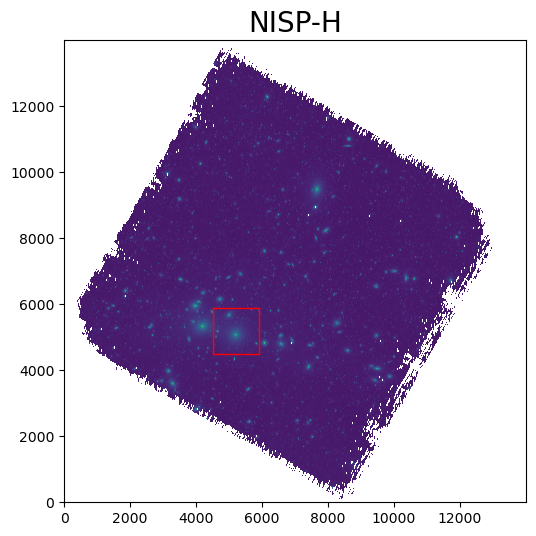

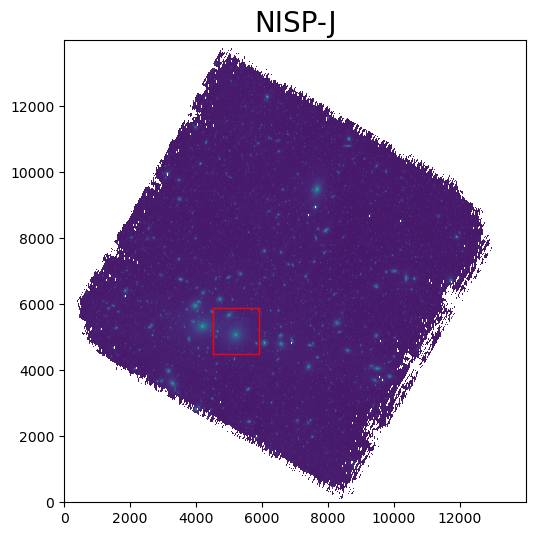

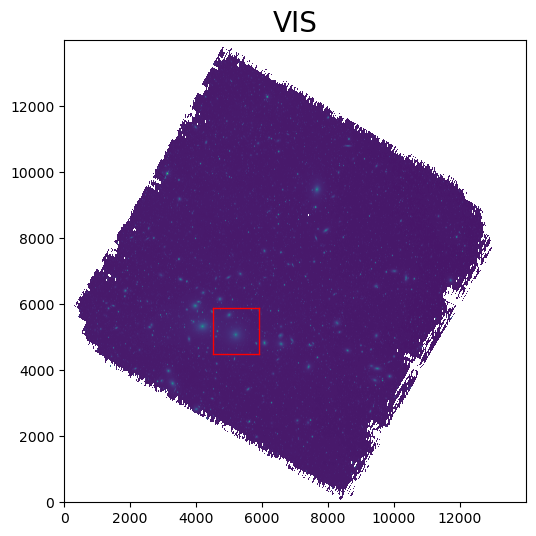

In [3]:
# The fits files are large, so, crop the files into two sections: crop1 and crop2
for i in range(0, nbands):
    hdu = fits.open(data_dir+fits_files[i])
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')
    
    # boundary of the area to be cropped
    xmin, xmax = 4500, 5900 
    ymin, ymax = 4500, 5900
    
    x = np.linspace(xmin, xmax, 100)
    y = ymin + x - x
    plt.plot(x, y, lw=1, color='red')
    y = ymax + x - x
    plt.plot(x, y, lw=1, color='red')
    
    y = np.linspace(ymin, ymax, 100)
    x = xmin + y - y
    plt.plot(x, y, lw=1, color='red')
    x = xmax + y - y
    plt.plot(x, y, lw=1, color='red')

Looks good. Let's get the centre of that red box and crop around it.

In [4]:
# centre of red boxes to crop the images
x_c, y_c = xmin+(0.5*(xmax-xmin)), ymin+(0.5*(ymax-ymin))
print(x_c, y_c) 
crop_size = [ymax-ymin+1, xmax-xmin+1]
print(crop_size) 

5200.0 5200.0
[1401, 1401]


We will use Astropy's [Cutout2D](https://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html) to make the crops.
Below, I have commented out where we save the files since I already have them. Please uncomment.

In [5]:
# use Cutout2D to crop the fits files
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

for i in range(0, nbands):
    # crop fits file image
    hdu = fits.open(data_dir+fits_files[i])[0]
    wcs = WCS(hdu.header)
    position = (x_c, y_c)
    cutout = Cutout2D(hdu.data, position=position, size=crop_size, wcs=wcs)
    name_out = 'crop1_%s' % fits_files[i]
    #fits.writeto(name_out, cutout.data, cutout.wcs.to_header(), overwrite=True)
    print("[produce %s]" % name_out)

[produce crop1_Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits]
[produce crop1_Euclid-NISP-H-ERO-Perseus-LSB.v2.fits]
[produce crop1_Euclid-NISP-J-ERO-Perseus-LSB.v2.fits]
[produce crop1_reproject-Euclid-VIS-ERO-Perseus-LSB.v6.fits]


Fantastic, now let's check this.

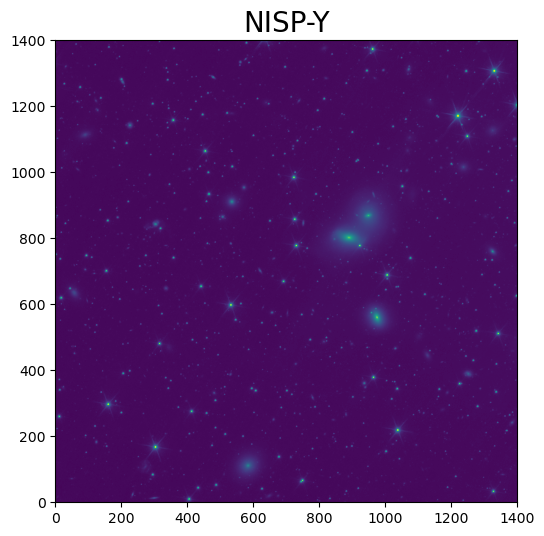

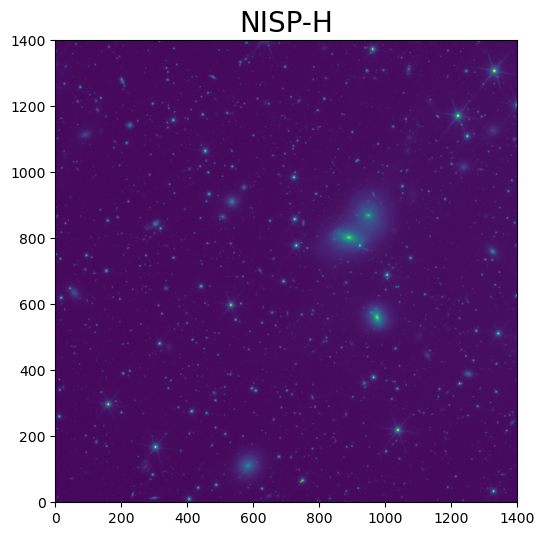

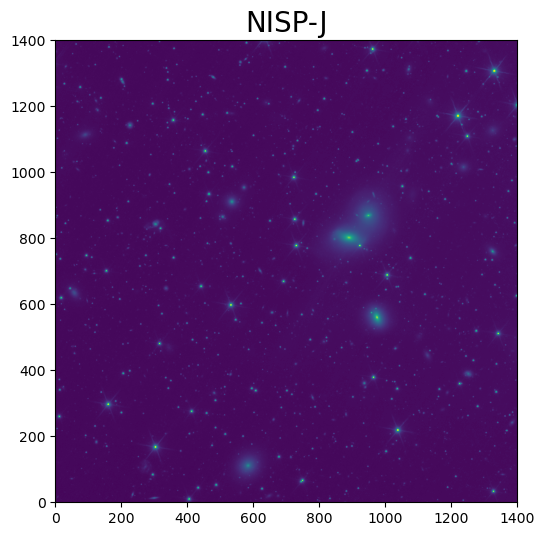

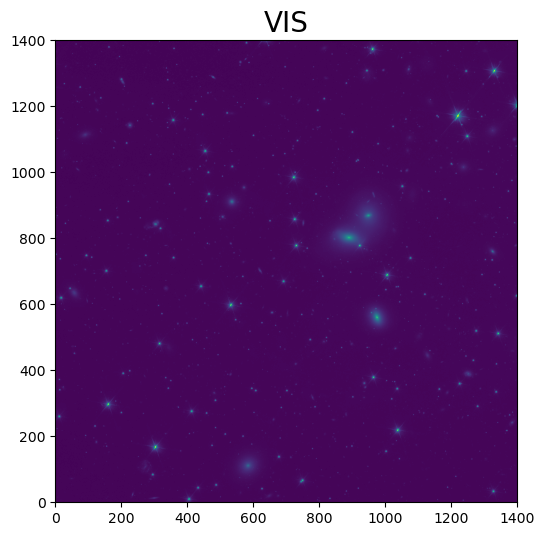

In [6]:
# check the cropped images for crop 1
for i in range(0, nbands):
    hdu = fits.open(data_dir+'Crop 1/crop1_%s' % fits_files[i])
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(12,6))
    f1 = plt.subplot()
    plt.title('%s' % filters[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower') 

Very pretty!
We will now load in these files and start doing source detection and extraction.

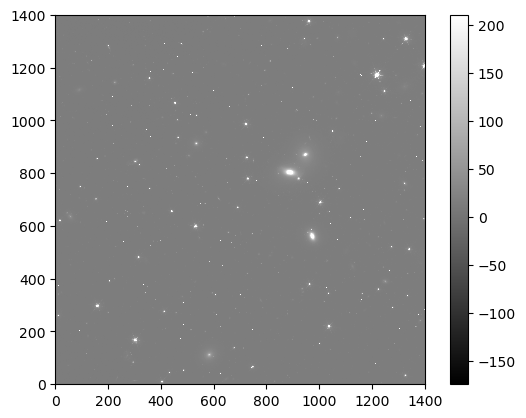

In [8]:
# load the fits image to perform the source detection and extraction from
crop_hdu = fits.open(data_dir+'Crop 1/crop1_reproject-Euclid-VIS-ERO-Perseus-LSB.v6.fits')
crop_hdu_data = np.array(crop_hdu[0].data)
crop1 = crop_hdu_data.astype(np.float64)
# to do background subtraction, we need the mean and std of the data
m, std = np.mean(crop1), np.std(crop1)
plt.imshow(crop1, interpolation='nearest', cmap='gray', vmin=m-std, vmax=m+std, origin='lower')
plt.colorbar()

We will use the package [Sep](https://sep.readthedocs.io/en/v1.1.x/) to do our source detection and extraction with. Let's get an estimate of the background noise.

14.40099048614502
0.267790824174881


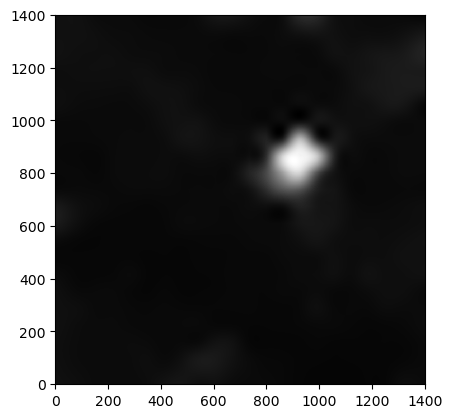

In [9]:
import sep
from matplotlib.patches import Ellipse
from astropy.table import QTable
# now we do the background subtraction
# we start by measuring a spatially varying background on the image
bkg = sep.Background(crop1)
# get a global mean and noise of the image
print(bkg.globalback)   # = 20.924741744995117
print(bkg.globalrms)    # = 7.120622158050537
# evaluate the background as a 2D array same size as the original image
bkg_image = bkg.back()
# show this background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
# evaluate the background noise as a 2D array same size as the original image
bkg_rms = bkg.rms()
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')

We'll subtract this background and extract the objects with a pixel threshold value $>2\sigma$.

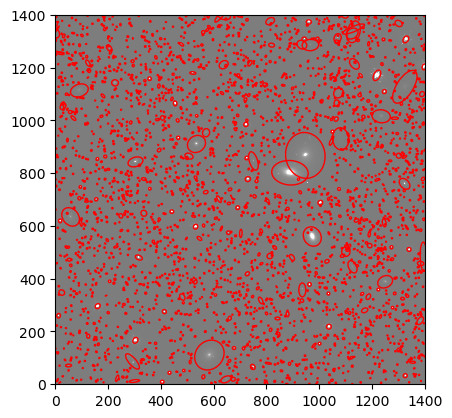

In [10]:
# subtract the background
sub_img = crop1 - bkg

# object detection
objects = sep.extract(sub_img, 2.0, err=bkg.globalrms)
nobj = len(objects)
# plot the background subtracted image along with the identified sources
fig, ax = plt.subplots()
mn, s = np.mean(sub_img), np.std(sub_img)
im = ax.imshow(sub_img, interpolation='nearest', cmap='gray', vmin=mn-std, vmax=mn+std, origin='lower')
# plot an ellipse for each object
for i in range(nobj):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i],
                angle=objects['theta'][i] * 180.0 / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

Now, we'll get the $x$ and $y$ coordinates of the objects and save them to a dataframe object.

In [11]:
# get x and y coordinates for the objects
idx = np.arange(nobj)
data_table = []
names = []
data_table.append(idx)
names.append('ID')
data_table.append(objects['x'])
names.append('x')
data_table.append(objects['y'])
names.append('y')

names = tuple(names)
t = QTable(data_table, names=names, meta={'name': 'catalog'})

coords = []   
xcoords = []
ycoords = []
for i in range(len(t)):
    x_coord = t['x'][i]
    y_coord = t['y'][i]
    xcoords.append(x_coord)
    ycoords.append(y_coord)
for j in range(len(xcoords)):
    coords.append((xcoords[j],ycoords[j]))    

In [12]:
print(t)

 ID          x                  y         
---- ------------------ ------------------
   0 1125.5297228492386  0.280773815384669
   1  877.2460482905148 0.7175099031971551
   2  962.9202789264311 1.0789191641556848
   3  990.5805170010293 0.9852407346642252
   4  591.8797211111563 3.9438996928843055
   5 16.756952114419853  5.970841480215976
   6  688.3329901593609  5.353650060565672
 ...                ...                ...
2940  954.8655341538963 1360.7359663514496
2941  960.6766014868948 1372.9063369671544
2942  1083.171326159326 1398.3020910685366
2943 1096.8169743019153   1397.17899858404
2944  1276.032634846069  1388.497403218579
2945 1282.2628654959788 1396.6785587985141
2946 1334.6641511439502 1399.5976275040198
Length = 2947 rows


Save this to a pandas dataframe. I have commented out the line where we save the centre positions. Please uncomment.

In [13]:
md = dict()    
md['center_x'] = t['x']
md['center_y'] = t['y']
# save coordinates of first cutout to a csv
csvfile_crop1 = pd.DataFrame(md)
imageDict = csvfile_crop1.to_dict('records')
csvfile_crop1.head()

centre_file = '/Users/ruby/Documents/Python Scripts/Euclid/ERO/Crop 1/eg2/centre_positions.csv'
#csvfile_crop1.to_csv(centre_file, index=False, header=True)

Okay, let's check this by loading it in.

In [15]:
# load in the centre coordinates
centre_pos = pd.read_csv('/Users/ruby/Documents/Python Scripts/Euclid/ERO/Crop 1/centre_positions.csv')
# check this
print(centre_pos)
print(centre_pos['center_x'])
print(centre_pos.columns)

         center_x     center_y
0      799.518435     3.149696
1     1063.459569     4.035192
2      794.003066     5.970564
3     1234.929881     5.034304
4     1157.293391     6.719091
...           ...          ...
1167   638.716087  1397.870062
1168   646.299090  1384.238089
1169   912.913479  1399.033052
1170  1097.573148  1397.201700
1171  1334.738699  1399.686123

[1172 rows x 2 columns]
0        799.518435
1       1063.459569
2        794.003066
3       1234.929881
4       1157.293391
           ...     
1167     638.716087
1168     646.299090
1169     912.913479
1170    1097.573148
1171    1334.738699
Name: center_x, Length: 1172, dtype: float64
Index(['center_x', 'center_y'], dtype='object')


Now let's use Astropy's [Cutout2D](https://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html) again with the centre positions to crop each individual detected object and write it to a fits file. Again, uncomment the line where we save the data.

In [17]:
centre_pos = pd.read_csv('/Users/ruby/Documents/Python Scripts/Euclid/ERO/Crop 1/centre_positions.csv')
path = "/Users/ruby/Documents/Python Scripts/Euclid/ERO/Crop 1/"
filename = '.fits'
hdu = fits.open(path+'crop1_reproject-Euclid-VIS-ERO-Perseus-LSB.v6.fits')[0]
#hdu = fits.open(path+'crop1_Euclid-NISP-H-ERO-Perseus-LSB.v2.fits')[0]
wcs = WCS(hdu.header)
for i in range(0, len(centre_pos['center_x'])-1):
    x_centre, y_centre = centre_pos['center_x'][i], centre_pos['center_y'][i]
    position = (x_centre, y_centre)
    crop_size=(100, 100)
    cutout = Cutout2D(hdu.data, position=position, size=crop_size, wcs=wcs, mode="partial", fill_value=0)
    name_out = str(i)+'crop'+filename
    #fits.writeto(name_out, cutout.data, cutout.wcs.to_header(), overwrite=True)
    print("[produce %s]" % name_out)

[produce 0crop.fits]
[produce 1crop.fits]
[produce 2crop.fits]
[produce 3crop.fits]
[produce 4crop.fits]
[produce 5crop.fits]
[produce 6crop.fits]
[produce 7crop.fits]
[produce 8crop.fits]
[produce 9crop.fits]
[produce 10crop.fits]
[produce 11crop.fits]
[produce 12crop.fits]
[produce 13crop.fits]
[produce 14crop.fits]
[produce 15crop.fits]
[produce 16crop.fits]
[produce 17crop.fits]
[produce 18crop.fits]
[produce 19crop.fits]
[produce 20crop.fits]
[produce 21crop.fits]
[produce 22crop.fits]
[produce 23crop.fits]
[produce 24crop.fits]
[produce 25crop.fits]
[produce 26crop.fits]
[produce 27crop.fits]
[produce 28crop.fits]
[produce 29crop.fits]
[produce 30crop.fits]
[produce 31crop.fits]
[produce 32crop.fits]
[produce 33crop.fits]
[produce 34crop.fits]
[produce 35crop.fits]
[produce 36crop.fits]
[produce 37crop.fits]
[produce 38crop.fits]
[produce 39crop.fits]
[produce 40crop.fits]
[produce 41crop.fits]
[produce 42crop.fits]
[produce 43crop.fits]
[produce 44crop.fits]
[produce 45crop.fits

### Lens painting
Now that we have the cutouts from the Euclid ERO data of the Perseus cluster, we can paint in our simulated lenses. Follow *Lens_Simulation.ipynb* to simulate the lenses.

In [18]:
# now we want to paint lenses into the cutouts
from skimage.transform import resize
# load in the lens dataset 
# only run this cell once since it takes a long time
path_lenses = '/Users/ruby/Documents/Python Scripts/LensMaker/Lens Data/'

# function to normalise lenses between 0 and 1
def Normalise(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

#we'll load the non-lenses first
lens_data = pd.read_csv(path_lenses+'Lens Parameter Prediction/lens_parameters.csv')
test_imgs = []      # images of lenses
lens_imgs = []      # images to add to data

In [19]:
# now load the lenses      
for i in range(lens_data.shape[0]):
    try:
        img = np.load(path_lenses+'Lensed/'+lens_data['fileName'][i].astype(str)+'.npy')
        test_imgs.append(img)
    except:
        # continue
        print(path_lenses+'Lensed/'+lens_data['fileName'][i].astype(str))
    
    # now we resize each element of train_imgs to 100x100 pixels
    lens = test_imgs[i]
    lens_norm = Normalise(lens)
    lens_resize = resize(lens_norm, (100,100))
    lens_imgs.append(lens_resize)

/var/folders/9h/r1jl5z8j0252hq0p27nzdc_40000gp/T/ipykernel_36603/2732743702.py:9: RuntimeWarning: invalid value encountered in divide
  return (data - np.min(data))/(np.max(data) - np.min(data))
/Users/ruby/miniconda3/envs/science/lib/python3.9/site-packages/skimage/transform/_warps.py:725: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/ruby/miniconda3/envs/science/lib/python3.9/site-packages/skimage/transform/_warps.py:729: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


Now let's add our lenses in! Please uncomment the line of code that writes the files out if you wish to save them.

In [22]:
# first we'll add non-lenses to the training dataset
import os

wdir = data_dir+'Crop 1/'
out = wdir+'Data/'
filters_ = ['NISP H/', 'NISP J/', 'NISP Y/', 'VIS/'] # doing this because loop broke
for _filter_ in filters_:
    for i in range(0, len(os.listdir(wdir+'NISP H/'))):
        hdu = fits.open(wdir+_filter_+str(i)+'crop.fits')[0]
        data_img = np.array(hdu.data)
        lens = lens_imgs[i]
        img = data_img + lens
        img /= np.max(img)
        name_out = wdir+out+_filter_+str(i)+'.fits'
        #fits.writeto(name_out, img, overwrite=True)

Great! Let's plot some examples!

In [31]:
lens_dir = out+'Lenses/'

filters_ = ['NISP-H/','NISP-J/', 'NISP-Y/', 'VIS/']
image = []
for i in range(0, len(os.listdir(lens_dir+'NISP-H/'))):
    hdu1 = fits.open(lens_dir+filters_[3]+str(i)+'.fits')[0]
    data1 = np.array(hdu1.data)
    hdu2 = fits.open(lens_dir+filters_[2]+str(i)+'.fits')[0]
    data2 = np.array(hdu2.data)
    hdu3 = fits.open(lens_dir+filters_[1]+str(i)+'.fits')[0]
    data3 = np.array(hdu3.data)
    img = np.dstack((data3, data2, data1))
    image.append(img)

500


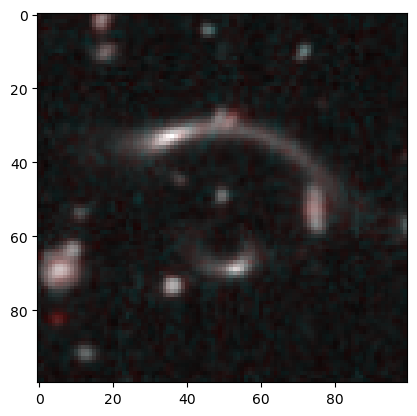

In [32]:
plt.imshow(image[0])
print(len(image))

This looks great! Let's show a few more.

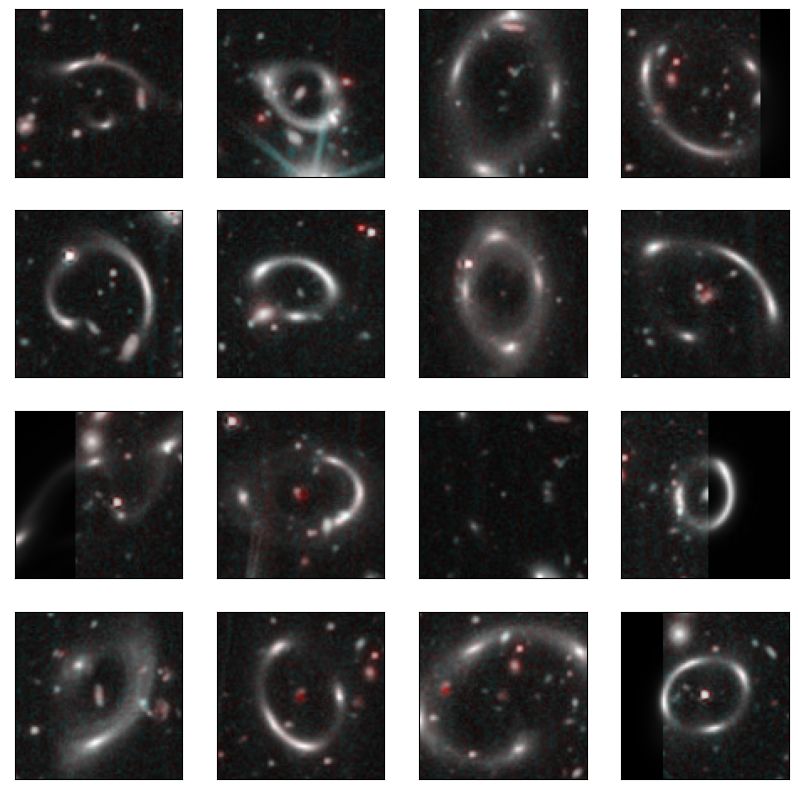

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i])
fig.suptitle('Simulated Lenses on Perseus Cluster')
plt.show()